# **SALES PREDICTION**

In [1]:
import warnings
import os

## Data Preparation

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, f1_score

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

### Import Dataset

In [7]:
df = pd.read_csv(r"C:\Documents\Datasets\advertising.csv")

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


#### Shape of dataset

In [10]:
df.shape

(200, 4)

#### Information on dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Checking for null values

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Checking for duplicate values

In [14]:
df.duplicated().sum()

0

## Data Visualization

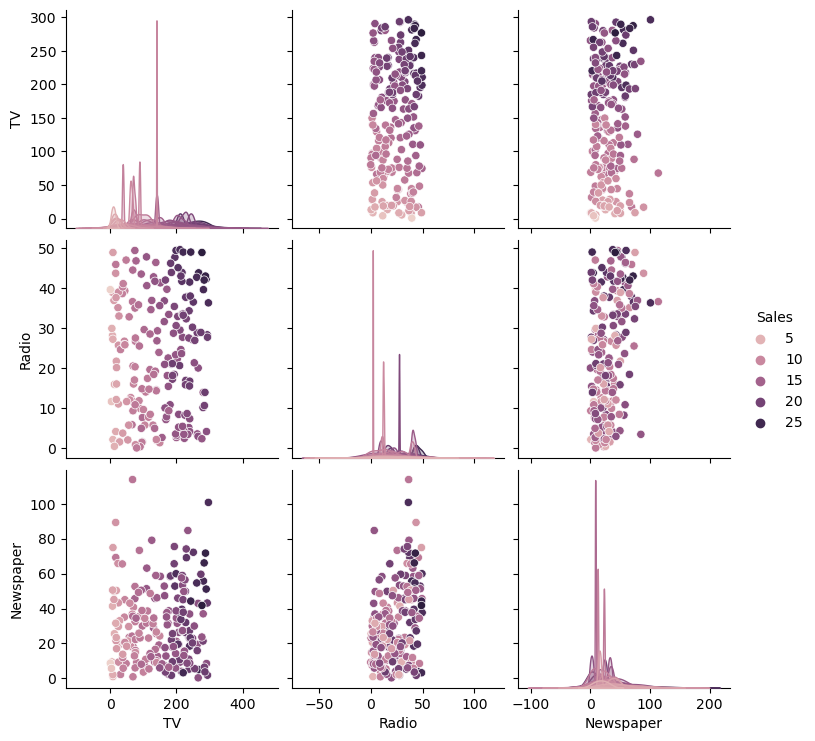

In [15]:
sns.pairplot(df, hue = 'Sales')

<Axes: >

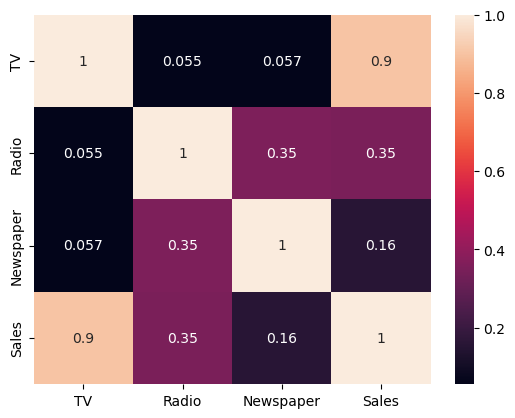

In [25]:
sns.heatmap(df.corr(), cmap = 'rocket', annot = True)

<Axes: ylabel='count'>

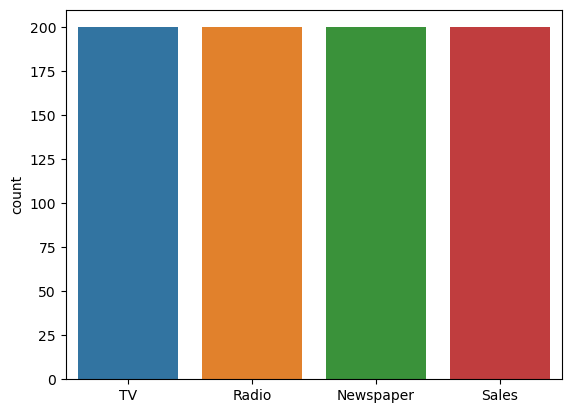

In [26]:
sns.countplot(data = df)

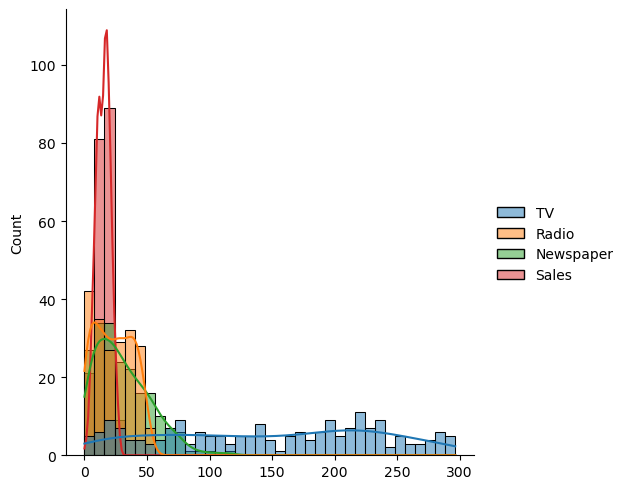

In [28]:
sns.displot(df, kde = True)

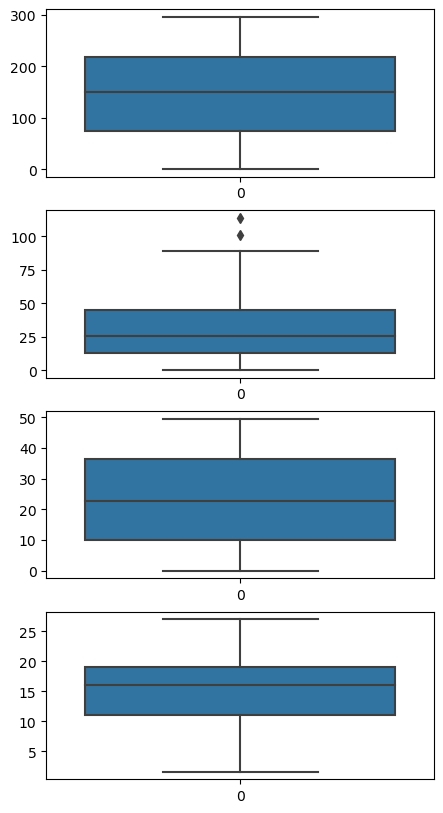

In [29]:
fig, axs = plt.subplots(4, figsize = (5,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0], )
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt4 = sns.boxplot(df['Sales'], ax = axs[3])
plt.show()

## Data Modeling

In [31]:
X = df.drop(columns=['Sales'], axis = 1)
Y = df['Sales']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [33]:
X_train.shape

(160, 3)

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

### Linear Regression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
res = lr.predict(X_test_scaled)

In [40]:
score = r2_score(y_test, res)

In [41]:
score

0.9059011844150826

### Ridge

In [43]:
rid = Ridge()

In [44]:
rid.fit(X_train_scaled, y_train)

Ridge()

In [45]:
pred_rid = rid.predict(X_test_scaled)

In [46]:
score_rid = r2_score(y_test, pred_rid)

In [47]:
score_rid

0.9056564972278859

### Random Forest Regressor

In [48]:
rfr = RandomForestRegressor()

In [49]:
par = {'max_depth': [2,4,6,8], 'criterion': ['squared_error', 'absolute_error'], 'min_samples_leaf' : [2,4,6], 'max_features' : ['sqrt', 'log2']}

In [50]:
gcv = GridSearchCV(estimator=rfr, param_grid=par, cv = 5, verbose=1)

In [51]:
gcv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6]},
             verbose=1)

In [52]:
gcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2}

In [53]:
rfr_new = RandomForestRegressor(criterion='squared_error', max_depth = 8, min_samples_leaf=2, max_features='sqrt')

In [54]:
rfr_new.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2)

In [55]:
pred_rfr = rfr_new.predict(X_test_scaled)

In [56]:
score_rfr = r2_score(y_test, pred_rfr)

In [57]:
score_rfr

0.9063964340436902

### ANN

In [58]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_dim = 3))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0,25))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0,25))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0,25))

model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'linear'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [66]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [67]:
model.compile(optimizer='sgd', loss = 'mae', metrics = ['mae'])

In [68]:
call = EarlyStopping(patience=10, verbose=1)

In [71]:
output = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, callbacks=call )

Epoch 1/50
4/4 [==============================] - 0s 54ms/step - loss: 9.7615 - mae: 9.7615 - val_loss: 9.1952 - val_mae: 9.1952
Epoch 2/50
4/4 [==============================] - 0s 28ms/step - loss: 9.2899 - mae: 9.2899 - val_loss: 8.7430 - val_mae: 8.7430
Epoch 3/50
4/4 [==============================] - 0s 31ms/step - loss: 8.8053 - mae: 8.8053 - val_loss: 8.2811 - val_mae: 8.2811
Epoch 4/50
4/4 [==============================] - 0s 31ms/step - loss: 8.5679 - mae: 8.5679 - val_loss: 7.9023 - val_mae: 7.9023
Epoch 5/50
4/4 [==============================] - 0s 29ms/step - loss: 7.9638 - mae: 7.9638 - val_loss: 7.3678 - val_mae: 7.3678
Epoch 6/50
4/4 [==============================] - 0s 30ms/step - loss: 7.4567 - mae: 7.4567 - val_loss: 6.9639 - val_mae: 6.9639
Epoch 7/50
4/4 [==============================] - 0s 34ms/step - loss: 6.9852 - mae: 6.9852 - val_loss: 6.4090 - val_mae: 6.4090
Epoch 8/50
4/4 [==============================] - 0s 40ms/step - loss: 6.7338 - mae: 6.7338 - val

In [72]:
pred_model = model.predict(X_test_scaled)

2/2 [==============================] - 1s 5ms/step


In [73]:
score_model = r2_score(y_test, pred_model)

## Testing

In [74]:
score_model

0.8055517527520536

In [75]:
output.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

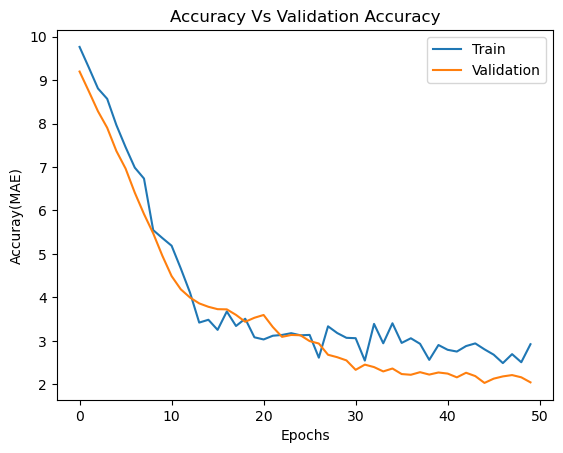

In [76]:
plt.plot(output.history['mae'])
plt.plot(output.history['val_mae'])
plt.title('Accuracy Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuray(MAE)')
plt.legend(['Train', 'Validation'])
plt.show()

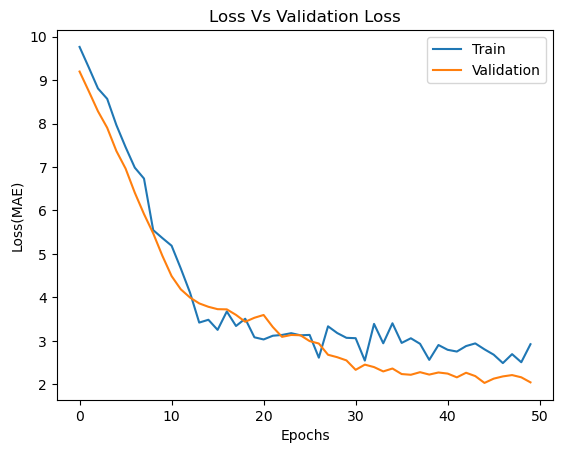

In [77]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Loss Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MAE)')
plt.legend(['Train', 'Validation'])
plt.show()

##### Clearly we have extremely small datasets of 200 records. Machine learning models like linear Regression and Random Forest Regressor reached upto 90% of accuracy.


##### Using ANN model, where after 50 epochs and going through several optimizer and number of layers, I reached to the accuracy of more than 90% which is good and through more intensive experimentation, we can for sure obtain greater value of accuracy.y.